# Forecasting
## Kirill Zakharov
### 22.02.2021

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [44]:
passengers = pd.read_csv('ausair.csv', index_col='Year', parse_dates=True)
passengers.head()

,Passengers
Year,
1970-01-01,7.32
1971-01-01,7.33
1972-01-01,7.80
1973-01-01,9.38
1974-01-01,10.66


## Экспоненциальное сглаживание

In [34]:
def exp_sm1(df, alpha):
    res = [df[0]]
    for t in range(1, len(df)):
        res.append(alpha * df[t] + (1 - alpha) * res[t-1])
    return res

def forecast(df, alpha, h):
    forecast = exp_sm1(df, alpha)
    return [forecast[-1]]*h

In [35]:
date1 = passengers.index[-1] + pd.DateOffset(years=1)
date2 = date1 + pd.DateOffset(years=9)
dates = pd.date_range(date1, date2, freq='YS')
dates

DatetimeIndex(['2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
               '2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01',
               '2025-01-01', '2026-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [51]:
num = passengers.values
h = 10
alpha = 0.4

forecast1 = pd.DataFrame(dates)
forecast1.columns = ['Year']
forecast1 = forecast1.set_index('Year')
# forecast1['Passengers'] = forecast(num[0, 0], h, alpha, passengers)
forecast1['Passengers'] = forecast(num[:,0],alpha, h)

### Сглаживание

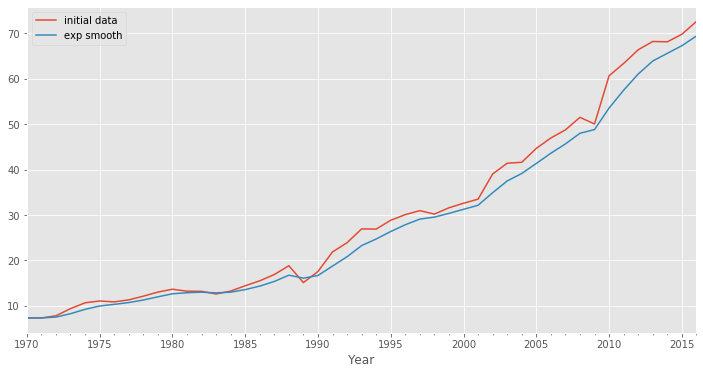

In [55]:
d = pd.DataFrame(pd.date_range('1970-01-01', '2016-01-01', freq='YS'))
d.columns = ['Year']
d = d.set_index('Year')

d['Passengers'] = exp_sm1(num[:,0], alpha)
passengers['Passengers'].plot(figsize=(12, 6), label='initial data')
d['Passengers'].plot(label='exp smooth')
plt.legend()
plt.show()

### Прогноз

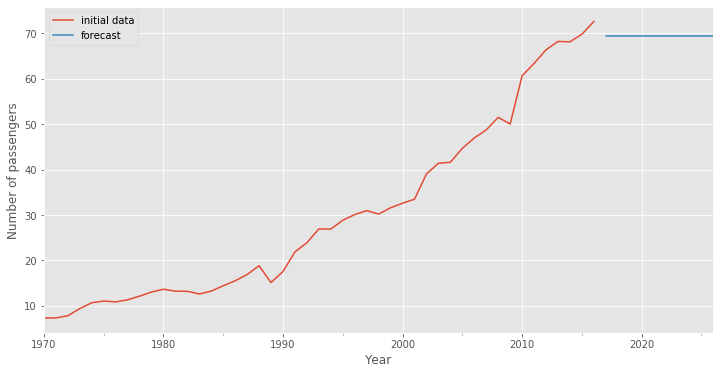

In [56]:
passengers['Passengers'].plot(figsize=(12, 6), label='initial data')
forecast1['Passengers'].plot(label='forecast')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

## Метод Хольта

In [168]:
alpha = 0.59
beta = 0.43

def forecast_H(y0, h, alpha, beta, df):
    num = df.values
    l = y0
    y = 0
    b = y0
    l_array = np.array([l])
    b_array = np.array([b])
    forecast = np.array([])
    
    for t in range(1, len(num)+h+1):
        y = l + h*b
        l = alpha*y + (1-alpha)*(l_array[t-1] - b_array[t-1])
        b = beta*(l-l_array[t-1]) + (1-beta)*b_array[t-1]
        
        l_array = np.append(l_array, l)
        b_array = np.append(b_array, b)
        forecast = np.append(forecast, y)
    return forecast[-h:]

forecast1 = forecast_H(num[-1, 0], h, alpha, beta, passengers)
forecast1

array([8.26561341e+24, 2.42240332e+25, 7.09933742e+25, 2.08060282e+26,
       6.09762268e+26, 1.78703028e+27, 5.23724964e+27, 1.53488075e+28,
       4.49827502e+28, 1.31830946e+29])

In [169]:
forecast2 = pd.DataFrame(dates)
forecast2.columns = ['Year']
forecast2 = forecast2.set_index('Year')
forecast2['Passengers'] = forecast_H(num[-1, 0], h, alpha, beta, passengers)

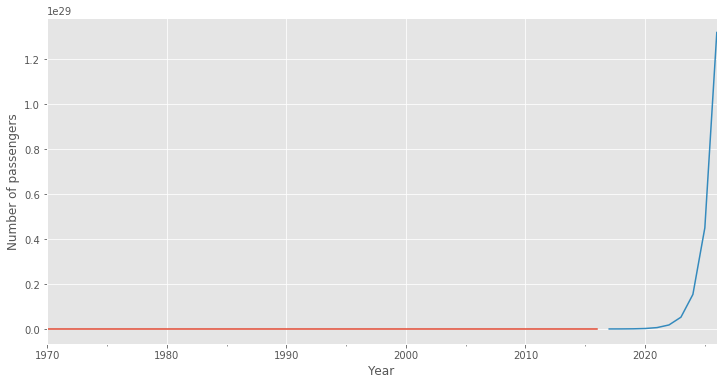

In [180]:
passengers['Passengers'].plot(figsize=(12, 6))
forecast2['Passengers'].plot()
plt.ylabel('Number of passengers')
plt.show()

In [94]:
def forecast_H2(df, alpha, beta):
    res = [df[0]]
    l, b = df[0], df[1] - df[0]
    for t in range(1, len(df)):

        prev_l, l = l, alpha*df[t] + (1-alpha)*(l+b)
        b = beta*(l-prev_l) + (1-beta)*b
        res.append(l+b)
        
    for t in range(len(df), h+1):
        prev_l, l = l, alpha*res[t-1] + (1-alpha)*(l+10*b)
        b = beta*(l-prev_l) + (1-beta)*b
        res.append(l+10*b)
        
    return res

47

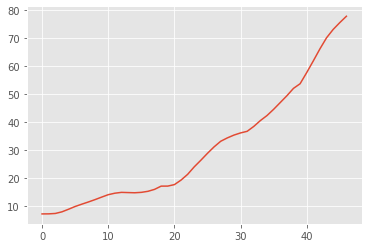

In [95]:
f1 = forecast_H2(num[:,0], 0.2, 0.4)
plt.plot(f1)
len(f1)

In [ ]:
def exp_sm1(df, alpha):
    res = [df[0]]
    for t in range(1, len(df)):
        res.append(alpha * df[t] + (1 - alpha) * res[t-1])
    return res

def forecast(df, alpha, h):
    forecast = exp_sm1(df, alpha)
    return [forecast[-1]]*h